In [2]:
import pandas as pd

df = pd.read_csv('/Users/rohith/Documents/Datasets/Iris_dataset/iris.csv')
df = df.drop(['Id'],axis=1)
target = df['Species']
s = set()
for val in target:
    s.add(val)
s = list(s)
rows = list(range(100,150))
df = df.drop(df.index[rows])
print(df)

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm          Species
0             5.1           3.5            1.4           0.2      Iris-setosa
1             4.9           3.0            1.4           0.2      Iris-setosa
2             4.7           3.2            1.3           0.2      Iris-setosa
3             4.6           3.1            1.5           0.2      Iris-setosa
4             5.0           3.6            1.4           0.2      Iris-setosa
5             5.4           3.9            1.7           0.4      Iris-setosa
6             4.6           3.4            1.4           0.3      Iris-setosa
7             5.0           3.4            1.5           0.2      Iris-setosa
8             4.4           2.9            1.4           0.2      Iris-setosa
9             4.9           3.1            1.5           0.1      Iris-setosa
10            5.4           3.7            1.5           0.2      Iris-setosa
11            4.8           3.4            1.6           0.2    

In [3]:
x = df['SepalLengthCm']
y = df['PetalLengthCm']

setosa_x = x[:50]
setosa_y = y[:50]

versicolor_x = x[50:]
versicolor_y = y[50:]

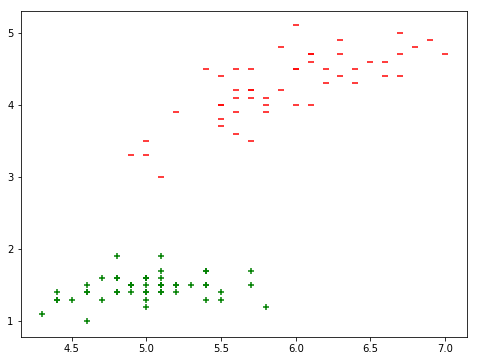

In [48]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(8,6))
plt.scatter(setosa_x,setosa_y,marker='+',color='green')
plt.scatter(versicolor_x,versicolor_y,marker='_',color='red')
plt.show()

In [5]:
df = df.drop(['SepalWidthCm','PetalWidthCm'],axis=1)

In [6]:
Y = []
target = df['Species']
for val in target:
    if(val == 'Iris-setosa'):
        Y.append(0)
    else:
        Y.append(1)
df = df.drop(['Species'],axis=1)
X = df.values.tolist()

In [7]:
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split
import numpy as np

X, Y = shuffle(X,Y)

x_train = []
y_train = []
x_test = []
y_test = []

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.9)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

/Users/rohith/anaconda3/envs/projects/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
print(y_train.shape)
y_train = y_train.reshape(90,1)
print(x_train[:,0].shape)

(90, 1)
(90,)


In [9]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test,y_pred))

1.0


In [52]:
## Support Vector Machine 
import numpy as np

train_f1 = x_train[:,0]
train_f2 = x_train[:,1]

train_f1 = train_f1.reshape(90,1)
train_f2 = train_f2.reshape(90,1)

w1 = np.zeros((90,1))
w2 = np.zeros((90,1))

epochs = 1
alpha = 0.0001

while(epochs < 10000):
    y = w1 * train_f1 + w2 * train_f2
    prod = y * y_train 
    count = 0
    for val in prod:
        if(val >= 1):
            cost = 0
            w1 = w1 - alpha * (2 * 1/epochs * w1)
            w2 = w2 - alpha * (2 * 1/epochs * w2)
            
        else:
            cost = 1 - val 
            w1 = w1 + alpha * (train_f1[count] * y_train[count] - 2 * 1/epochs * w1)
            w2 = w2 + alpha * (train_f2[count] * y_train[count] - 2 * 1/epochs * w2)
        count += 1
    epochs += 1

In [53]:
index = list(range(10,90))

w1 = np.delete(w1,index)
w2 = np.delete(w2,index)

In [54]:
w1 = w1.reshape(10,1)
w2 = w2.reshape(10,1)

In [55]:
test_f1 = x_test[:,0]
test_f2 = x_test[:,1]

In [56]:
test_f1 = test_f1.reshape(10,1)
test_f2 = test_f2.reshape(10,1)

In [57]:
y_pred = w1 * test_f1 + w2 * test_f2

In [58]:
predictions = []
for val in y_pred:
    if(val >= 1):
        predictions.append(1)
    else:
        predictions.append(0)

In [59]:
print(predictions)

[0, 1, 0, 1, 1, 0, 0, 1, 0, 1]


In [60]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,predictions))

1.0
